In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
#from qiskit.tools.jupyter import *
from qiskit.visualization import *

import sys
import types
import pip
import numpy as np
import math
import pandas as pd

pi = math.pi

#Connection with IBM Q systems (both physical and simulation)

# Loading your IBM Q account(s)
#provider = IBMQ.enable_account('a977738bf7ef3132730c858452468736136b011055c8488e3a0c780a47d9039f19285f1df35ff174d999f8902fcb6ec5cb0397811f70c74188569aa91117c350')
import getpass, time
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, Aer, IBMQ

# import basic plot tools
from qiskit.tools.visualization import *

backend = Aer.get_backend('qasm_simulator')

In [4]:
df_data_1 = pd.read_csv('DataForQComparison.csv')
df_data_1.head()
dataset=df_data_1
dataset['Teta']=np.arctan(dataset['Feature 1'].values.astype(int)/dataset['Feature 2'].values.astype(int))
dataset['ID']=dataset.reset_index().index
dataset.head(10)

,Feature 1,Feature 2,Teta,ID
0,900.0,112.0,1.446988,0
1,-1590.0,-262.0,1.407484,1
2,-1740.0,2170.0,-0.675864,2
3,-819.0,-363.0,1.153592,3
4,-809.0,-67.9,1.488167,4
5,-801.0,752.0,-0.816940,5
6,-703.0,-302.0,1.165046,6
7,-881.0,-207.0,1.340022,7
8,-333.0,-657.0,0.469112,8
9,-463.0,-467.0,0.781097,9


In [5]:
dataset.shape

(20, 4)

In [6]:
# Creating Quantum Circuit called “qc” involving your Quantum Register “qr”
# and your Classical Register “cr”
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit ( qr, cr, name="k_means")

#Circuit test
#from the dataset we get the first and the 7th theta valuest
i=0
j=7

theta_1 = dataset.at[i,'Teta']
theta_2 = dataset.at[i+j,'Teta']
#Compose the quantum circuit via qiskit
#apply the first Hadamard gate to the ancilla qubit
qc.h(qr[1])
#apply the U3 gates to the controlled qubits
qc.u3(theta_1, pi, pi, qr[0])
qc.u3(theta_2, pi, pi, qr[2])
#apply the c-swap circuit
qc.cswap(qr[1], qr[0], qr[2])
#apply the second Hadamard gate to the ancilla qubit
qc.h(qr[1])
#make the measurement
qc.measure(qr[1], cr[1])

job_exp = execute(qc, backend=backend, shots=4096)
result = job_exp.result()
print(result)

Result(backend_name='qasm_simulator', backend_version='0.3.4', date=datetime.datetime(2019, 12, 13, 12, 20, 44, 652282), header=Obj(backend_name='qasm_simulator', backend_version='0.3.4'), job_id='29bea0eb-7ce1-4eed-bc0a-bdd67c3b9a7c', metadata={'max_memory_mb': 4038, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.0067378}, qobj_id='a142131d-a356-4108-94fa-3e50192419da', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=4091, 0x2=5)), header=Obj(clbit_labels=[['c1', 0], ['c1', 1], ['c1', 2]], creg_sizes=[['c1', 3]], memory_slots=3, n_qubits=3, name='k_means', qreg_sizes=[['q1', 3]], qubit_labels=[['q1', 0], ['q1', 1], ['q1', 2]]), meas_level=<MeasLevel.CLASSIFIED: 2>, metadata={'measure_sampling': True, 'method': 'statevector', 'parallel_shots': 1, 'parallel_state_update': 8}, seed_simulator=208276906, shots=4096, status='DONE', success=True, time_taken=0.0066445)], status='COMPLETED', success=True, time_taken=0.01096963882446289)


In [7]:
circuit_drawer(qc)

In [8]:
print(result.get_counts(qc))

{'000': 4091, '010': 5}


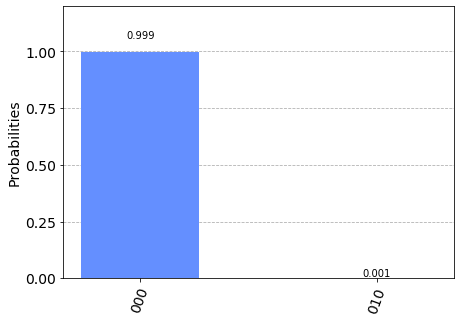

In [9]:
plot_histogram(result.get_counts(qc))

In [10]:
# State vector visualizing

#state_vec_sim_bck=”statevector_simulator”
state_vec_sim_bck=Aer.get_backend('statevector_simulator')

n = 3 
# number of qubits
q = QuantumRegister(n)
c = ClassicalRegister(n)

i=0
j=7

qc = QuantumCircuit(q, c, name="State_super")
#theta_1 = dataset.at[i,’Teta’]theta_1=0
Theta_2=2
#theta_2 = dataset.at[i+j,’Teta’]#Compose the quantum circuit via qiskit
qc.h(q[1])
qc.h(q[0])
qc.h(q[2])

qc.u3(theta_1, pi, pi, q[0])
qc.u3(theta_2, pi, pi, q[2])
qc.cswap(q[1], q[0], q[2])
qc.h(q[1])

# execute the quantum circuit
job = execute(qc, backend=state_vec_sim_bck)
state_superposition = job.result().get_statevector(qc)

#The overall matrix defining the whole circuit
#_Coefficients_

def overlap(state1, state2):
     return round(np.dot(state1.conj(), state2))

print(state_superposition)

overlap(state_superposition, state_superposition)

[ 0.99144758-1.71326797e-16j  0.08818191-8.89071185e-17j
  0.        +6.07086554e-17j -0.02672884+1.35829328e-17j
  0.08818191-8.56337792e-17j  0.00712253-1.38520745e-17j
  0.02672884-2.78376368e-18j  0.        +4.36129339e-19j]


(1+0j)

In [11]:
#_probability density_

def state_2_rho(state):
    return np.outer(state, state.conj())

rho_superposition=state_2_rho(state_superposition)
print(rho_superposition)

[[ 9.82968310e-01+0.00000000e+00j  8.74277392e-02+7.30388239e-17j
  -1.04010195e-32-6.01894497e-17j -2.65002475e-02-8.88739868e-18j
   8.74277392e-02+6.97934796e-17j  7.06161775e-03+1.25133250e-17j
   2.65002475e-02-1.81941142e-18j -7.47206428e-35-4.32399379e-19j]
 [ 8.74277392e-02-7.30388239e-17j  7.77604884e-03+0.00000000e+00j
  -5.39743162e-33-5.35340505e-18j -2.35700043e-03+1.17861555e-18j
   7.77604884e-03-2.88649303e-19j  6.28078514e-04+5.88258500e-19j
   2.35700043e-03-2.13090688e-18j -3.87750028e-35-3.84587171e-20j]
 [-1.04010195e-32+6.01894497e-17j -5.39743162e-33+5.35340505e-18j
   3.68554085e-33+0.00000000e+00j  8.24601586e-34-1.62267216e-18j
  -5.19871160e-33+5.35340505e-18j -8.40940816e-34+4.32399379e-19j
  -1.68998550e-34+1.62267216e-18j  2.64768258e-35+0.00000000e+00j]
 [-2.65002475e-02+8.88739868e-18j -2.35700043e-03-1.17861555e-18j
   8.24601586e-34+1.62267216e-18j  7.14431087e-04+0.00000000e+00j
  -2.35700043e-03-1.09112298e-18j -1.90377061e-04-2.73505052e-19j
  -7.14

In [12]:
rho_superposition=state_2_rho(state_superposition)
print(rho_superposition)

[[ 9.82968310e-01+0.00000000e+00j  8.74277392e-02+7.30388239e-17j
  -1.04010195e-32-6.01894497e-17j -2.65002475e-02-8.88739868e-18j
   8.74277392e-02+6.97934796e-17j  7.06161775e-03+1.25133250e-17j
   2.65002475e-02-1.81941142e-18j -7.47206428e-35-4.32399379e-19j]
 [ 8.74277392e-02-7.30388239e-17j  7.77604884e-03+0.00000000e+00j
  -5.39743162e-33-5.35340505e-18j -2.35700043e-03+1.17861555e-18j
   7.77604884e-03-2.88649303e-19j  6.28078514e-04+5.88258500e-19j
   2.35700043e-03-2.13090688e-18j -3.87750028e-35-3.84587171e-20j]
 [-1.04010195e-32+6.01894497e-17j -5.39743162e-33+5.35340505e-18j
   3.68554085e-33+0.00000000e+00j  8.24601586e-34-1.62267216e-18j
  -5.19871160e-33+5.35340505e-18j -8.40940816e-34+4.32399379e-19j
  -1.68998550e-34+1.62267216e-18j  2.64768258e-35+0.00000000e+00j]
 [-2.65002475e-02+8.88739868e-18j -2.35700043e-03-1.17861555e-18j
   8.24601586e-34+1.62267216e-18j  7.14431087e-04+0.00000000e+00j
  -2.35700043e-03-1.09112298e-18j -1.90377061e-04-2.73505052e-19j
  -7.14

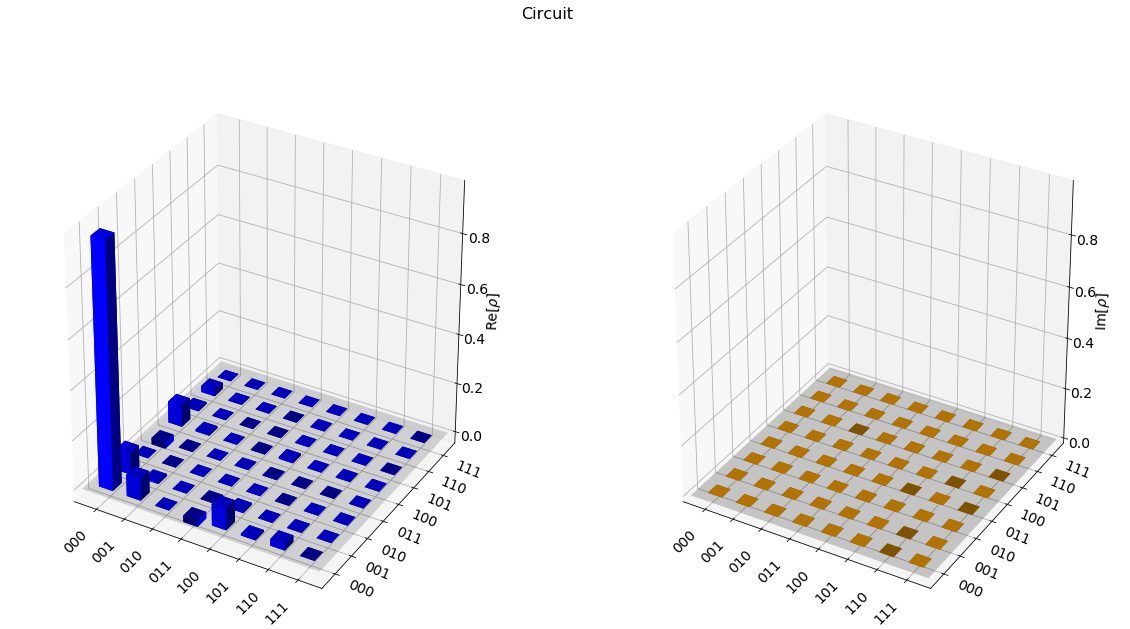

In [13]:
from qiskit.tools.visualization import plot_state_city, plot_bloch_multivector, plot_state_paulivec, plot_state_hinton, plot_state_qsphere 
plot_state_city(rho_superposition, figsize=(20,10), title="Circuit", color=['blue', 'orange'])
#plot_state(rho_superposition,’city’)

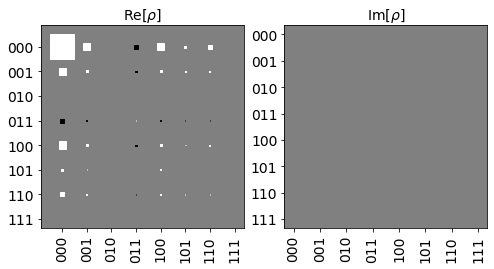

In [14]:
plot_state_hinton(state_superposition)

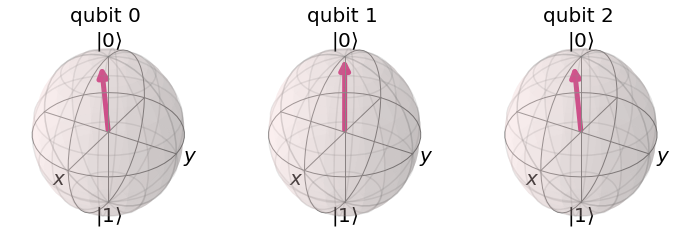

In [15]:
plot_bloch_multivector(state_superposition)

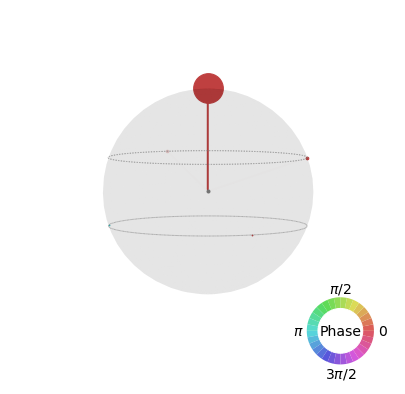

In [16]:
plot_state_qsphere(state_superposition)

In [17]:
import pandas as pd
#In order to make a confrontation between the Euclidean and quantum distance we perform a double loop cycle in the dataset data getting the distance #(running the circuit) on all pairs of points.

# Define result dataframe
df_res = pd.DataFrame(columns=('I','J','Feature 1_i','Feature 1_j','Feature 2_i','Feature 2_j','Theta_i','Theta_j','Quantum_Distance','ClassicDistance'))

#Define a loop to compute the distance between each pair of points

elements=20

#main cycle
for i in range(0,elements):
    for j in range(0,elements):
      # Set the parament theta about different point
        theta_1 = dataset.at[i,'Teta']
        theta_2 = dataset.at[j,'Teta']
ai_i = dataset.at[i,'Feature 1']
ai_j = dataset.at[j,'Feature 1']
sc_i = dataset.at[i,'Feature 2']
sc_j = dataset.at[j,'Feature 2']
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit ( qr, cr, name="k_means")
# Compose the quantum circuit via qiskit
qc.h(qr[1])

qc.u3(theta_1, pi, pi, qr[0])
qc.u3(theta_2, pi, pi, qr[2])
qc.cswap(qr[1], qr[0], qr[2])
qc.h(qr[1])
qc.measure(qr[1], cr[1])

# eseguo il circuito costruito sulla coppia I,J
job_exp = execute(qc, backend=backend, shots=2048)
result = job_exp.result()
# calculate the ratio between the 0 and tha one result in measure registry
v1=result.get_counts(qc)['000']
if '010' in result.get_counts(qc):
    v2=result.get_counts(qc)['010']
else: 
    v2=0
prob=v2/(v1+v2) 
# Probability of obtaining 1 that is “quantum distance”
# Classic distance calculation
cl_dist=math.sqrt(((ai_i-ai_j)**2)+((sc_i-sc_j)**2))
#Final output writing
df_res = df_res.append({'I':i, 'J':j,'Feature 1_i':ai_i,'Feature 1_j':ai_j,'Feature 2_i':sc_i,'Feature 2_j':sc_j,'Theta_i':theta_1, 'Theta_j':theta_2, 'Quantum_Distance':prob,'ClassicDistance':cl_dist} , ignore_index=True)
print('JOB Ended')

JOB Ended


In [18]:
qc.draw()

In [19]:
df_res.to_csv('QuantumDistances.csv',index=False)

df_res = pd.read_csv('QuantumDistances.csv')

dataset=df_res
dataset

,I,J,Feature 1_i,Feature 1_j,Feature 2_i,Feature 2_j,Theta_i,Theta_j,Quantum_Distance,ClassicDistance
0,19.0,19.0,38.9,38.9,-720.0,-720.0,-0.052729,-0.052729,0.0,0.0


In [22]:
#Calculation Correlation between Quantum and Classic Distance

cor=dataset['Quantum_Distance'].corr(dataset['ClassicDistance'],method='pearson')
print("{0:.0f}%".format(cor * 100))

nan%


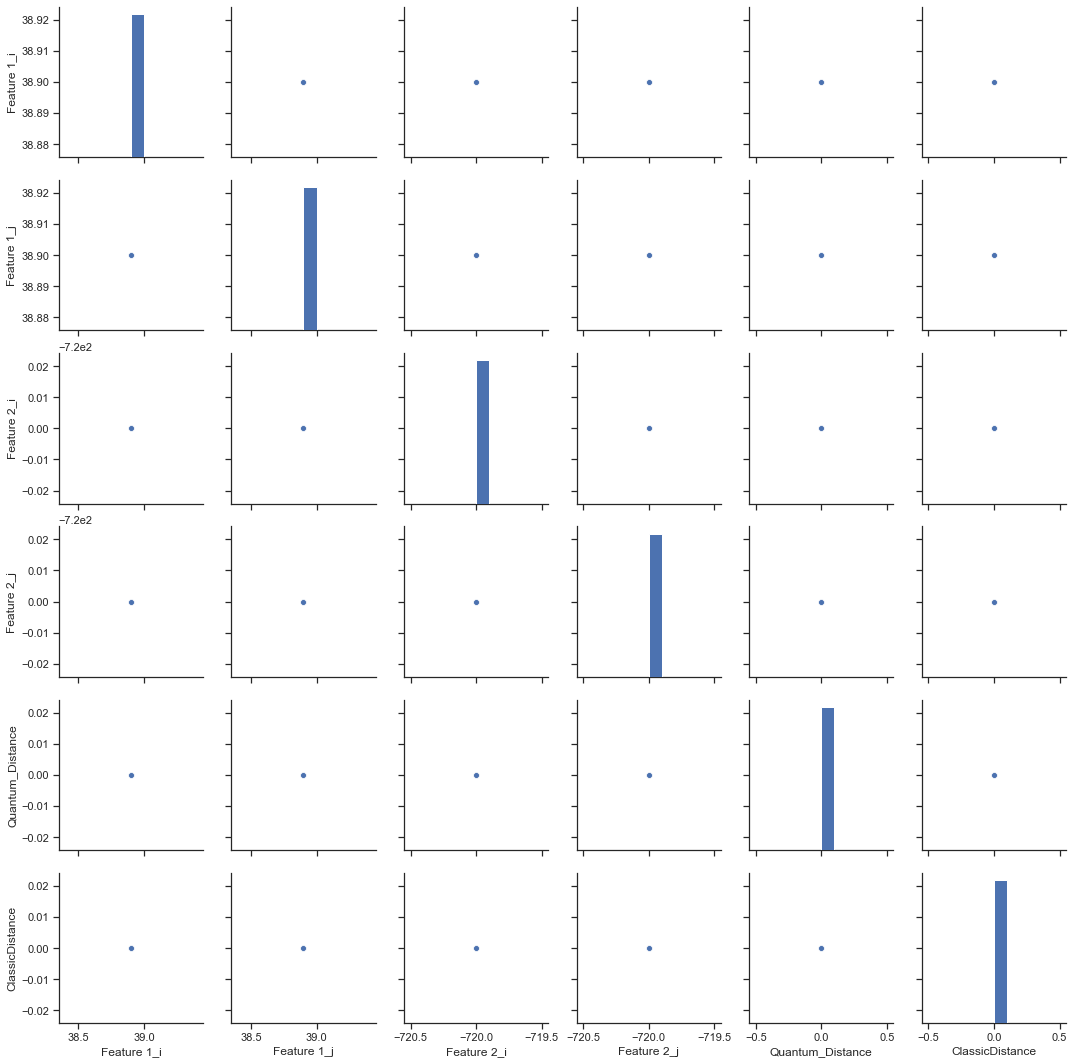

In [21]:
#Diagrams of correlation with Seaborn of a dataset with distances only

dataset.drop(['Theta_i','Theta_j','I','J'], axis=1, inplace=True)

# Determine the pairplot matrix for correlation verification
import seaborn as sns
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(dataset)